# SVR

# Cómo importar las librerías


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [18]:
dataset = pd.read_csv('https://raw.githubusercontent.com/JuanMi-Galan/machinelearning-az/refs/heads/master/original/Part%202%20-%20Regression/Section%207%20-%20Support%20Vector%20Regression%20(SVR)/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [19]:
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
"""

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

# Escalado de variables

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [21]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [22]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Ajustar la regresión con el dataset

In [23]:
from sklearn.svm import SVR

In [24]:
regression = SVR(kernel = "rbf")
regression.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predicción de nuestros modelos con SVR


In [25]:
y_pred = regression.predict(sc_X.transform(np.array([[6.5]])))
y_pred

array([-0.27861589])

In [29]:
y_pred = sc_y.inverse_transform(regression.predict(sc_X.transform([[6.5]])).reshape(-1,1))
y_pred

array([[170370.0204065]])

# Visualización de los resultados del SVR

<ipython-input-23-1859832381f1>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


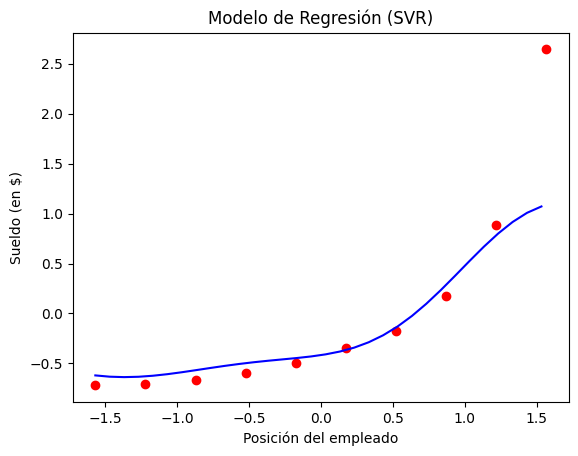

In [23]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

# Visualización de los resultados del SVR

<ipython-input-30-6faa45d116ab>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


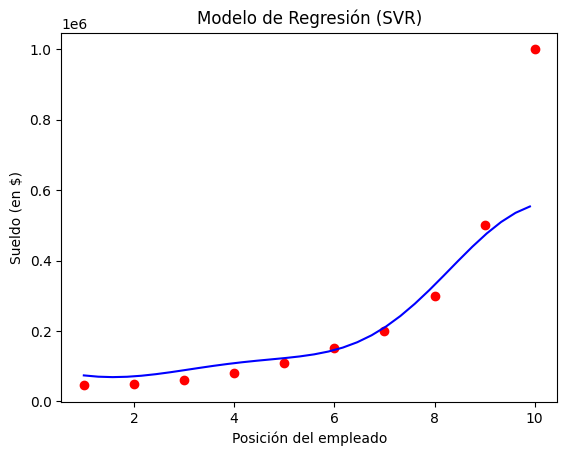

In [30]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1,1)), color = "red")
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regression.predict(X_grid).reshape(-1,1)), color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()